In [3]:
import matplotlib.pyplot as plt
import pandas 
import numpy
import re

In [4]:
backtest_result = 'backtest_result/results_summary_btc_15m.csv'
df = pandas.read_csv(backtest_result)

In [34]:
lll =[4,6,6,1,2,3,5,6,6,6,5,6,6,6,6]
print(numpy.median(lll), numpy.mean(lll))

6.0 4.933333333333334


kinda_best_length = 6;	kinda_best_multiplier = 19.5
toplist_length: [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
toplist_multiplier: [18.5 11.5 19.5 17.  19.  15.  15.5 16.  12.5 12. ]


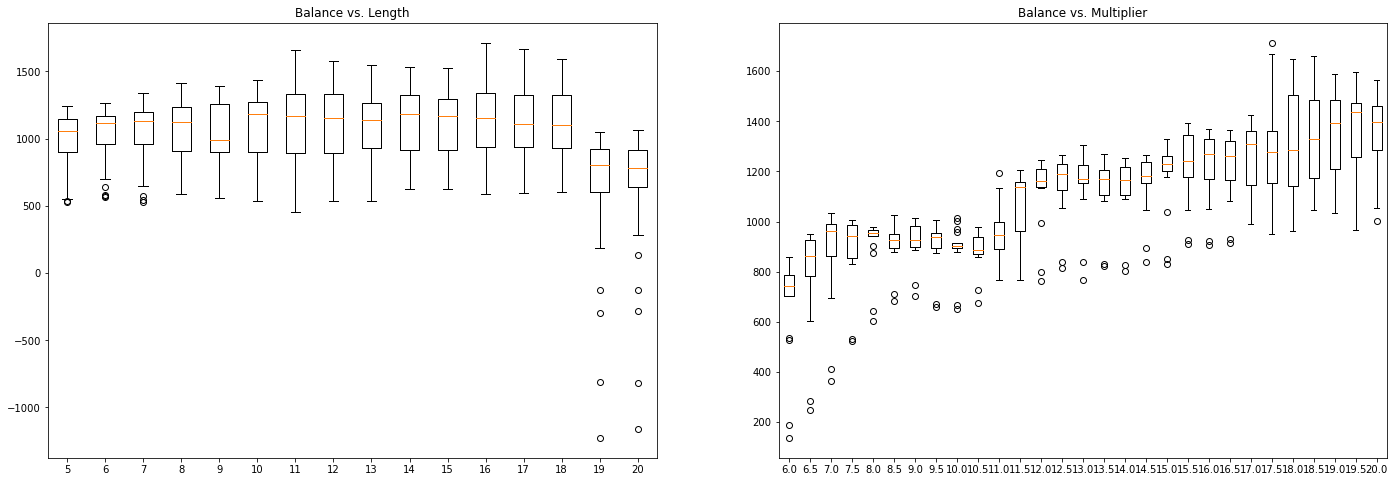

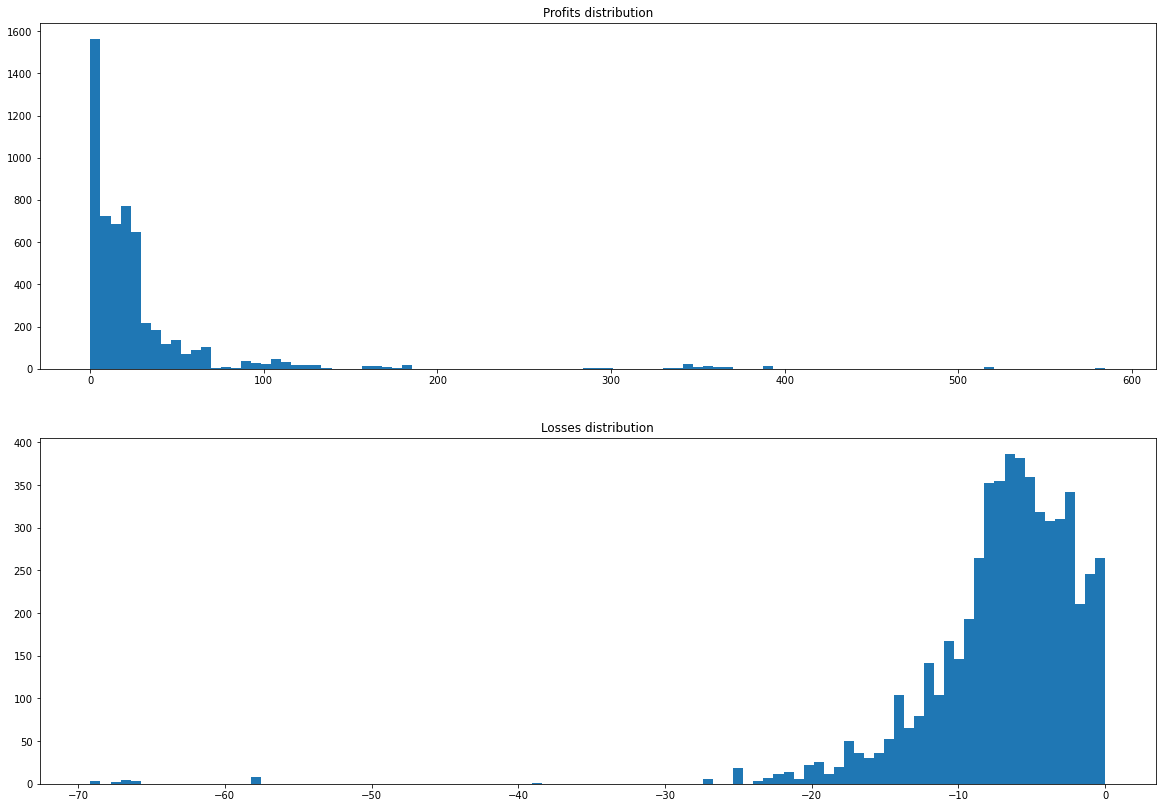

In [39]:
class TopList():
  def __init__(self, length=10):
    self.toplist = {'key':numpy.zeros(length), 'value':numpy.zeros(length)}
    self.threshold = 0
    self.count = 0
    self.length = length

  def push(self, key, value):
    if (value > self.threshold or self.count < self.length):
      min_index = numpy.argmin(self.toplist['value'])
      self.toplist['key'][min_index] = key
      self.toplist['value'][min_index] = value

      self.threshold = value
      self.count += 1
      
def plot1(df):
  df['balance_std'] = (df['balance'] - df['balance'].mean()) / df['balance'].std()

  # Plot balances distribution against Length and Multiplier 
  balance_for_lengths = []
  balance_for_multipliers = []
  max_mean_balance_for_lengths = 0
  max_mean_balance_for_multipliers = 0
  kinda_best_length = 0
  kinda_best_multiplier = 0
  
  # Length
  toplist_length = TopList()
  for length in range(5,21):
    balance_for_each_length = list(df[df['config_length'].values == length]['balance'])
    mean = numpy.median(balance_for_each_length)
    ### exp
    q3, q1 = numpy.percentile(balance_for_each_length, [75,25])
    iqr = q3-q1
    std = numpy.std(balance_for_each_length)
    mean = mean/std
    ### exp
    balance_for_lengths.append(balance_for_each_length)
    toplist_length.push(length, mean)

    if (mean > max_mean_balance_for_lengths):
      kinda_best_length = length
      max_mean_balance_for_lengths = mean


  fig = plt.figure(figsize=[24, 8])
  ax = fig.add_subplot(1, 2, 1)
  ax.boxplot(balance_for_lengths)
  ax.set_xticklabels(range(5,21))
  ax.set_title('Balance vs. Length')

  # Multiplier
  toplist_multiplier = TopList()
  for multiplier in numpy.arange(6,20.5,0.5):
    balance_for_each_multiplier = list(df[df['config_multiplier'].values == multiplier]['balance'])
    mean = numpy.median(balance_for_each_multiplier)
    ### exp
    q3, q1 = numpy.percentile(balance_for_each_length, [75,25])
    iqr = q3-q1
    std = numpy.std(balance_for_each_length)
    mean = mean/std
    ### exp
    balance_for_multipliers.append(balance_for_each_multiplier)
    toplist_multiplier.push(multiplier, mean)
    if (mean > max_mean_balance_for_multipliers):
      kinda_best_multiplier = multiplier
      max_mean_balance_for_multipliers = mean

  ax = fig.add_subplot(1, 2, 2)
  ax.boxplot(balance_for_multipliers)
  ax.set_xticklabels(numpy.arange(6,20.5,0.5))
  ax.set_title('Balance vs. Multiplier')

  print(f"kinda_best_length = {kinda_best_length};\tkinda_best_multiplier = {kinda_best_multiplier}")

  # Plot pnl amounts histogram
  print('toplist_length:',toplist_length.toplist['key'])
  print('toplist_multiplier:',toplist_multiplier.toplist['key'])
  profit_amounts = []
  loss_amounts = []
  for multiplier in toplist_multiplier.toplist['key']:
    for length in toplist_length.toplist['key']:
      # print(length,multiplier)
      df2 = df.query(f"config_length=={length} & config_multiplier=={multiplier}").copy()
      profit_amounts = profit_amounts + re.sub("\[|\]|\"|\s", "", df2.iloc[0].profit_amounts).split(',')
      loss_amounts = loss_amounts + re.sub("\[|\]|\"|\s", "", df2.iloc[0].loss_amounts).split(',')

  profit_amounts = [float(x) for x in profit_amounts]
  loss_amounts = [float(x) for x in loss_amounts]

  fig = plt.figure(figsize=[20, 14])
  ax = fig.add_subplot(2, 1, 1)
  ax.hist(profit_amounts, 101)
  # ax.set_xticks(range(0,600,20))
  ax.set_title('Profits distribution')

  ax = fig.add_subplot(2, 1, 2)
  ax.hist(loss_amounts, 101)
  # ax.set_xticks(range(0,600,20))
  ax.set_title('Losses distribution')


plot1(df)

# Get the best mean value from the 2 above tables
# df.query('config_length==14 & config_multiplier==19.5')['balance']